In [780]:
# import modules

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import math

# ignore warning
import warnings
warnings.filterwarnings("ignore")

## I. Preprocessing Stage

In [781]:
# load data for January 2020
jan_2020 = pd.read_csv("../raw_data/yellow_tripdata_2020-01.csv")
jan_2020.to_pickle('../raw_data/yellow_tripdata_2020-01.pkl')
jan_2020 = pd.read_pickle('../raw_data/yellow_tripdata_2020-01.pkl')
jan_2020

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


In [782]:
# load data for February 2020
feb_2020 = pd.read_csv("../raw_data/yellow_tripdata_2020-02.csv")
feb_2020.to_pickle('../raw_data/yellow_tripdata_2020-02.pkl')
feb_2020 = pd.read_pickle('../raw_data/yellow_tripdata_2020-02.pkl')
feb_2020

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,1.0,N,145,7,1.0,11.00,0.50,0.5,2.45,0.0,0.3,14.75,0.0
1,1.0,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,1.0,N,45,61,1.0,21.50,3.00,0.5,6.30,0.0,0.3,31.60,2.5
2,1.0,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,1.0,N,186,140,1.0,11.00,3.00,0.5,1.00,0.0,0.3,15.80,2.5
3,2.0,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,1.0,N,144,140,1.0,18.00,0.50,0.5,3.00,0.0,0.3,24.80,2.5
4,2.0,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,1.0,N,238,152,2.0,9.50,0.50,0.5,0.00,0.0,0.3,10.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299349,NaN,2020-02-28 14:28:00,2020-02-28 14:54:00,NaN,8.60,NaN,NaN,259,247,NaN,30.81,2.75,0.5,0.00,0.0,0.3,34.36,0.0
6299350,NaN,2020-02-28 14:03:00,2020-02-28 14:11:00,NaN,3.01,NaN,NaN,212,31,NaN,22.59,2.75,0.5,0.00,0.0,0.3,26.14,0.0
6299351,NaN,2020-02-28 14:55:00,2020-02-28 15:02:00,NaN,0.71,NaN,NaN,42,42,NaN,13.43,2.75,0.5,0.00,0.0,0.3,16.98,0.0
6299352,NaN,2020-02-28 14:29:00,2020-02-28 14:51:00,NaN,12.40,NaN,NaN,38,53,NaN,30.54,2.75,0.5,0.00,0.0,0.3,34.09,0.0


In [783]:
# load data for March 2020
mar_2020 = pd.read_csv("../raw_data/yellow_tripdata_2020-03.csv")
mar_2020.to_pickle('../raw_data/yellow_tripdata_2020-03.pkl')
mar_2020 = pd.read_pickle('../raw_data/yellow_tripdata_2020-03.pkl')
mar_2020

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.00,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2.0,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1.0,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1.0,6.00,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2.0,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1.0,5.00,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1.0,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1.0,16.50,3.0,0.5,4.05,0.0,0.3,24.35,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007287,NaN,2020-03-31 23:21:00,2020-03-31 23:33:00,NaN,5.43,NaN,NaN,137,87,NaN,30.47,0.0,0.5,0.00,0.0,0.3,33.77,2.5
3007288,NaN,2020-03-31 23:57:00,2020-04-01 00:26:00,NaN,13.21,NaN,NaN,137,71,NaN,37.97,0.0,0.5,0.00,0.0,0.3,41.27,2.5
3007289,NaN,2020-03-31 23:22:01,2020-03-31 23:43:52,NaN,12.14,NaN,NaN,137,32,NaN,37.10,0.0,0.0,0.00,0.0,0.3,39.90,2.5
3007290,NaN,2020-03-31 23:18:53,2020-03-31 23:32:21,NaN,7.01,NaN,NaN,137,159,NaN,20.07,0.0,0.0,0.00,0.0,0.3,22.87,2.5


In [784]:
# load data from January 2019

jan = pd.read_csv("../raw_data/yellow_tripdata_2019-01.csv")
jan.to_pickle('../raw_data/yellow_tripdata_2019-01.pkl')
jan = pd.read_pickle('../raw_data/yellow_tripdata_2019-01.pkl')
jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,N,263,4,1,18.0,0.5,0.5,3.86,0.0,0.3,23.16,0.0
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [785]:
# load data from February 2019

feb = pd.read_csv("../raw_data/yellow_tripdata_2019-02.csv")
feb.to_pickle('../raw_data/yellow_tripdata_2019-02.pkl')
feb = pd.read_pickle('../raw_data/yellow_tripdata_2019-02.pkl')
feb

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1,N,48,234,1,9.0,0.5,0.5,2.0,0.0,0.3,12.3,0.0
1,1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1,N,230,93,2,32.0,0.5,0.5,0.0,0.0,0.3,33.3,0.0
2,1,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1,N,95,95,2,5.5,0.5,0.5,0.0,0.0,0.3,6.8,0.0
4,1,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1,N,140,263,2,5.0,0.5,0.5,0.0,0.0,0.3,6.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019370,2,2019-02-28 23:29:08,2019-02-28 23:29:11,1,0.0,1,N,193,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7019371,2,2019-02-28 22:48:47,2019-02-28 23:50:19,1,0.0,1,N,141,193,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
7019372,2,2019-02-28 23:41:23,2019-02-28 23:42:23,1,0.0,1,N,264,264,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7019373,2,2019-02-28 23:12:52,2019-02-28 23:14:16,1,0.0,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [786]:
# load data from March 2019

mar = pd.read_csv("../raw_data/yellow_tripdata_2019-03.csv")
mar.to_pickle('../raw_data/yellow_tripdata_2019-03.pkl')
mar = pd.read_pickle('../raw_data/yellow_tripdata_2019-03.pkl')
mar

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-03-01 00:24:41,2019-03-01 00:25:31,1,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80,0.0
1,1,2019-03-01 00:25:27,2019-03-01 00:36:37,2,3.70,1,N,95,130,1,13.0,0.5,0.5,0.70,0.00,0.3,15.00,0.0
2,1,2019-03-01 00:05:21,2019-03-01 00:38:23,1,14.10,1,N,249,28,1,41.0,3.0,0.5,10.10,5.76,0.3,60.66,2.5
3,1,2019-03-01 00:48:55,2019-03-01 01:06:03,1,9.60,1,N,138,98,2,27.0,0.5,0.5,0.00,0.00,0.3,28.30,0.0
4,1,2019-03-01 00:11:42,2019-03-01 00:16:40,1,0.80,1,N,48,48,1,5.5,3.0,0.5,3.00,0.00,0.3,12.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832540,2,2019-03-31 23:58:52,2019-04-01 00:05:04,1,0.74,1,N,186,186,1,5.5,0.5,0.5,2.33,0.00,0.3,11.63,2.5
7832541,2,2019-03-31 23:20:15,2019-03-31 23:24:12,1,1.11,1,N,263,236,2,5.5,0.5,0.5,0.00,0.00,0.3,9.30,2.5
7832542,2,2019-03-31 23:32:15,2019-03-31 23:54:36,1,13.17,1,N,75,134,2,37.0,0.5,0.5,0.00,5.76,0.3,44.06,0.0
7832543,2,2019-03-31 22:32:57,2019-03-31 23:21:22,1,0.00,1,N,237,193,2,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2.5


## External Data (Weather)
Weather data is obtained from the National Centers for Environmental Information website: https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00094728/detail

In [787]:
# 1. convert data to csv ✓

# read weather data csv 2019 - 2020
jan_weather = pd.read_csv('../external_data/weather_jan2019.csv', delimiter=";")
feb_weather = pd.read_csv('../external_data/weather_feb2019.csv', delimiter=";")
mar_weather = pd.read_csv('../external_data/weather_mar2019.csv', delimiter=";")

jan_2020_weather = pd.read_csv('../external_data/weather_jan2020.csv', delimiter=";")
feb_2020_weather = pd.read_csv('../external_data/weather_feb2020.csv', delimiter=";")
mar_2020_weather = pd.read_csv('../external_data/weather_mar2020.csv', delimiter=";")

# remove summary in the latest row for all df
jan_weather.drop(jan_weather.tail(1).index,inplace=True)
feb_weather.drop(feb_weather.tail(1).index,inplace=True)
mar_weather.drop(mar_weather.tail(1).index,inplace=True)
jan_2020_weather.drop(jan_2020_weather.tail(1).index,inplace=True)
feb_2020_weather.drop(feb_2020_weather.tail(1).index,inplace=True)
mar_2020_weather.drop(mar_2020_weather.tail(1).index,inplace=True)

In [788]:
# check if columns are correctly added
mar_weather

,Year,Month,Day,Max,Min,"Rain, Melted Snow, Etc. (in)","Snow, Ice, Pellets, Hail (in)","Snow, Ice, Pellets, Hail, Ice on Ground (in)"
0,2019,3,1,35,26,"0,11","1,4","1,2"
1,2019,3,2,41,31,"0,53",4,"3,9"
2,2019,3,3,42,33,"0,52",3,"1,2"
3,2019,3,4,38,28,"0,29",2,"3,9"
4,2019,3,5,32,20,0,0,2
5,2019,3,6,26,19,T,T,"1,2"
6,2019,3,7,32,18,0,0,"1,2"
7,2019,3,8,39,24,0,0,0
8,2019,3,9,49,34,0,0,0
9,2019,3,10,43,35,"0,54",0,0


In [789]:
# convert day month year to datetime data type so easier to add
def convert_day_month(month_df):
    year = month_df['Year']
    month = month_df['Month']
    day = month_df['Day']

    df = pd.concat([year, month, day], axis=1)
    month_df['weather_datetime'] = pd.to_datetime(df)

convert_day_month(jan_weather)
convert_day_month(feb_weather)
convert_day_month(mar_weather)
convert_day_month(jan_2020_weather)
convert_day_month(feb_2020_weather)
convert_day_month(mar_2020_weather)

# weather_median to represent one day's weather
def weather_median(month_df):
    max_weather = month_df['Max']
    min_weather = month_df['Min']
    average = (max_weather.astype(float) + min_weather.astype(float)) / 2
    month_df['weather_median'] = average

weather_median(jan_weather)
weather_median(feb_weather)
weather_median(mar_weather)
weather_median(jan_2020_weather)
weather_median(feb_2020_weather)
weather_median(mar_2020_weather)

### concatenate Jan - Mar weather data for 2019 - 2020 & export to csv

In [790]:
weather_2019_2020 = pd.concat([jan_weather, feb_weather, mar_weather, jan_2020_weather, feb_2020_weather, mar_2020_weather])
weather_2019_2020.to_csv("../preprocessed_data/weather_2019_2020")

In [791]:
weather_2019_2020

,Year,Month,Day,Max,Min,"Rain, Melted Snow, Etc. (in)","Snow, Ice, Pellets, Hail (in)","Snow, Ice, Pellets, Hail, Ice on Ground (in)",weather_datetime,weather_median
0,2019.0,1.0,1,58,39,"0,06",0,0,2019-01-01,48.5
1,2019.0,1.0,2,40,35,0,0,0,2019-01-02,37.5
2,2019.0,1.0,3,44,37,0,0,0,2019-01-03,40.5
3,2019.0,1.0,4,47,35,0,0,0,2019-01-04,41.0
4,2019.0,1.0,5,47,41,"0,5",0,0,2019-01-05,44.0
...,...,...,...,...,...,...,...,...,...,...
26,2020.0,3.0,27,69,50,T,0,0.0,2020-03-27,59.5
27,2020.0,3.0,28,54,44,"0,45",0,0.0,2020-03-28,49.0
28,2020.0,3.0,29,47,44,"0,05",0,0.0,2020-03-29,45.5
29,2020.0,3.0,30,52,41,"0,04",0,0.0,2020-03-30,46.5


In [792]:
# 2. add weather data to existing jan-mar dataframe ✓
jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,N,263,4,1,18.0,0.5,0.5,3.86,0.0,0.3,23.16,0.0
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [793]:
mar

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-03-01 00:24:41,2019-03-01 00:25:31,1,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80,0.0
1,1,2019-03-01 00:25:27,2019-03-01 00:36:37,2,3.70,1,N,95,130,1,13.0,0.5,0.5,0.70,0.00,0.3,15.00,0.0
2,1,2019-03-01 00:05:21,2019-03-01 00:38:23,1,14.10,1,N,249,28,1,41.0,3.0,0.5,10.10,5.76,0.3,60.66,2.5
3,1,2019-03-01 00:48:55,2019-03-01 01:06:03,1,9.60,1,N,138,98,2,27.0,0.5,0.5,0.00,0.00,0.3,28.30,0.0
4,1,2019-03-01 00:11:42,2019-03-01 00:16:40,1,0.80,1,N,48,48,1,5.5,3.0,0.5,3.00,0.00,0.3,12.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832540,2,2019-03-31 23:58:52,2019-04-01 00:05:04,1,0.74,1,N,186,186,1,5.5,0.5,0.5,2.33,0.00,0.3,11.63,2.5
7832541,2,2019-03-31 23:20:15,2019-03-31 23:24:12,1,1.11,1,N,263,236,2,5.5,0.5,0.5,0.00,0.00,0.3,9.30,2.5
7832542,2,2019-03-31 23:32:15,2019-03-31 23:54:36,1,13.17,1,N,75,134,2,37.0,0.5,0.5,0.00,5.76,0.3,44.06,0.0
7832543,2,2019-03-31 22:32:57,2019-03-31 23:21:22,1,0.00,1,N,237,193,2,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2.5


In [794]:
# join for the months

def join_weather(month_data):
    # from https://stackoverflow.com/questions/16176996/keep-only-date-part-when-using-pandas-to-datetime
    # pickup datetime to datetime column only
    month_data['taxi_datetime'] = pd.to_datetime(month_data['tpep_pickup_datetime']).dt.date # assumption !
    
    # make sure they both are the same datatype
    month_data['taxi_datetime'] = month_data['taxi_datetime'].astype('datetime64[ns]')
    weather_2019_2020['weather_datetime'] = weather_2019_2020['weather_datetime'].astype('datetime64[ns]')
    
    merge_data = pd.merge(month_data, weather_2019_2020, left_on='taxi_datetime', right_on='weather_datetime')
    return merge_data

jan = join_weather(jan)

In [795]:
feb = join_weather(feb)
mar = join_weather(mar)
jan_2020 = join_weather(jan_2020)
feb_2020 = join_weather(feb_2020)
mar_2020 = join_weather(mar_2020)

In [796]:
jan = jan.drop(columns=['weather_datetime', 'taxi_datetime', 'Month', 'Year', 'Day', 'Max', 'Min'])

In [797]:
feb = feb.drop(columns=['weather_datetime', 'taxi_datetime', 'Month', 'Year', 'Day', 'Max', 'Min'])

In [798]:
mar = mar.drop(columns=['weather_datetime', 'taxi_datetime', 'Month', 'Year', 'Day', 'Max', 'Min'])

In [799]:
jan_2020 = jan_2020.drop(columns=['weather_datetime', 'taxi_datetime', 'Month', 'Year', 'Day', 'Max', 'Min'])
feb_2020 = feb_2020.drop(columns=['weather_datetime', 'taxi_datetime', 'Month', 'Year', 'Day', 'Max', 'Min'])
feb_2020 = mar_2020.drop(columns=['weather_datetime', 'taxi_datetime', 'Month', 'Year', 'Day', 'Max', 'Min'])

## data distribution plot

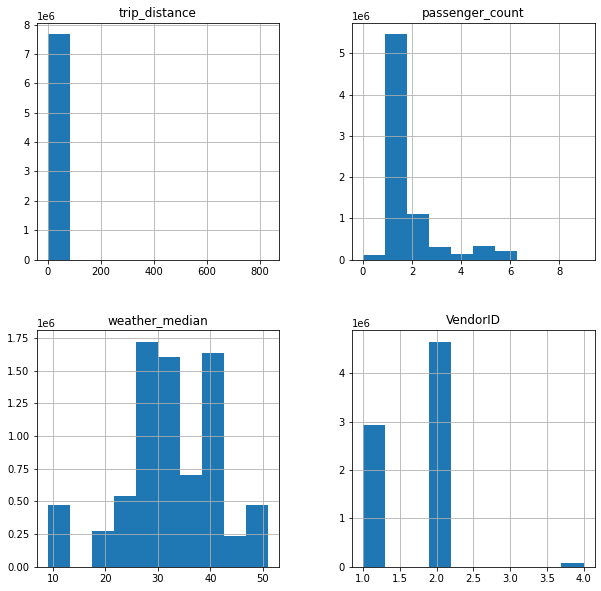

<Figure size 432x288 with 0 Axes>

In [800]:
# univariate histogram
histogram = jan.hist(figsize=(10,10), bins = 10, column=["trip_distance", "passenger_count", "weather_median","VendorID"])
# show plot
plt.show()
plt.savefig("../plots/data_distribution.png")

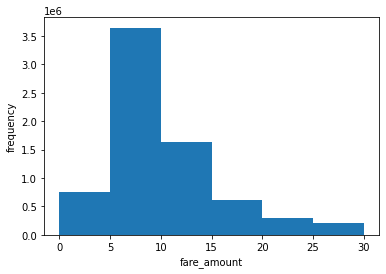

<Figure size 432x288 with 0 Axes>

In [801]:
# creating histogram for fare_amount
fig, ax = plt.subplots(figsize =(6, 4))
ax.hist(jan_joined["fare_amount"], bins = [0, 5, 10, 15, 20, 25, 30])
ax.set_xlabel("fare_amount")
ax.set_ylabel("frequency")
plt.show()
plt.savefig("../plots/data_distribution2.png")
#MinMaxScaler

### describe data (data analysis)

In [802]:
# check data
jan.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,weather_median
count,7.667332e+06,7.667332e+06,7.667332e+06,7.667332e+06,7.667332e+06,7.667332e+06,7.667332e+06,7.667332e+06,7.667332e+06,7.667332e+06,7.667332e+06,7.667332e+06,7.667332e+06,7.667332e+06,2.811803e+06,7.667332e+06
mean,1.636753e+00,1.567056e+00,2.801051e+00,1.058369e+00,1.655018e+02,1.637534e+02,1.291763e+00,1.240923e+01,3.280373e-01,4.968463e-01,1.827391e+00,3.169196e-01,2.993384e-01,1.568207e+01,3.289704e-05,3.228946e+01
std,5.398293e-01,1.224404e+00,3.737510e+00,6.780962e-01,6.639145e+01,7.036420e+01,4.733182e-01,2.620798e+02,5.074904e-01,5.337701e-02,2.501198e+00,2.023688e+00,1.911616e-02,2.623009e+02,9.068713e-03,9.045694e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.620000e+02,-6.000000e+01,-5.000000e-01,-6.350000e+01,-7.000000e+01,-3.000000e-01,-3.628000e+02,0.000000e+00,9.000000e+00
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.300000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.190000e+00,0.000000e+00,2.800000e+01
50%,2.000000e+00,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.430000e+00,0.000000e+00,3.000000e-01,1.127000e+01,0.000000e+00,3.400000e+01
75%,2.000000e+00,2.000000e+00,2.800000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.330000e+00,0.000000e+00,3.000000e-01,1.656000e+01,0.000000e+00,3.950000e+01
max,4.000000e+00,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232599e+05,5.353800e+02,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,6.232617e+05,2.500000e+00,5.100000e+01


In [803]:
jan['passenger_count'].value_counts()

1    5455834
2    1114023
5     323794
3     314710
6     200789
4     140744
0     117381
8         29
7         19
9          9
Name: passenger_count, dtype: int64

In [804]:
feb.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,weather_median
count,7.019180e+06,7.019180e+06,7.019180e+06,7.019180e+06,7.019180e+06,7.019180e+06,7.019180e+06,7.019180e+06,7.019180e+06,7.019180e+06,7.019180e+06,7.019180e+06,7.019180e+06,7.019180e+06,7.019180e+06,7.019180e+06
mean,1.636629e+00,1.571372e+00,2.884908e+00,1.061126e+00,1.635092e+02,1.618031e+02,1.269921e+00,1.274669e+01,1.157956e+00,4.959597e-01,2.163232e+00,3.417294e-01,2.990787e-01,1.855685e+01,2.174609e+00,3.608374e+01
std,5.248647e-01,1.228169e+00,3.780107e+00,6.375086e-01,6.594389e+01,7.007862e+01,4.666101e-01,2.559184e+02,1.268864e+00,5.240469e-02,2.634814e+00,1.673116e+00,2.279335e-02,2.560464e+02,8.464254e-01,8.518916e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.000000e+02,-4.500000e+00,-5.000000e-01,-6.200000e+01,-2.626000e+01,-3.000000e-01,-4.008000e+02,-2.500000e+00,9.000000e+00
25%,1.000000e+00,1.000000e+00,9.400000e-01,1.000000e+00,1.140000e+02,1.120000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.100000e+01,2.500000e+00,2.950000e+01
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.416000e+01,2.500000e+00,3.700000e+01
75%,2.000000e+00,2.000000e+00,2.910000e+00,1.000000e+00,2.330000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00,4.150000e+01
max,4.000000e+00,9.000000e+00,7.015000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711231e+05,1.850000e+01,2.439000e+01,4.996900e+02,7.715200e+02,1.000000e+00,6.711249e+05,2.750000e+00,6.100000e+01


In [805]:
mar.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,weather_median
count,7.832400e+06,7.832400e+06,7.832400e+06,7.832400e+06,7.832400e+06,7.832400e+06,7.832400e+06,7.832400e+06,7.832400e+06,7.832400e+06,7.832400e+06,7.832400e+06,7.832400e+06,7.832400e+06,7.832400e+06,7.832400e+06
mean,1.636287e+00,1.575185e+00,2.991046e+00,1.066854e+00,1.619921e+02,1.602755e+02,1.278305e+00,1.317918e+01,1.203206e+00,4.955391e-01,2.231702e+00,3.649460e-01,2.989715e-01,1.919105e+01,2.281124e+00,4.153873e+01
std,5.133705e-01,1.228355e+00,3.890162e+00,6.982434e-01,6.587545e+01,7.023627e+01,4.713256e-01,3.468323e+02,1.284214e+00,6.905995e-02,5.063139e+01,1.677114e+00,2.404781e-02,3.962311e+02,7.145820e-01,9.353923e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.470000e+02,-5.750000e+01,-5.000000e-01,-8.989000e+01,-2.500000e+01,-3.000000e-01,-4.503000e+02,-2.500000e+00,2.250000e+01
25%,1.000000e+00,1.000000e+00,9.700000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,3.750000e+01
50%,2.000000e+00,1.000000e+00,1.610000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.475000e+01,2.500000e+00,4.150000e+01
75%,2.000000e+00,2.000000e+00,3.050000e+00,1.000000e+00,2.310000e+02,2.330000e+02,2.000000e+00,1.450000e+01,2.500000e+00,5.000000e-01,2.950000e+00,0.000000e+00,3.000000e-01,2.030000e+01,2.500000e+00,4.750000e+01
max,4.000000e+00,9.000000e+00,2.371700e+02,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,9.432748e+05,2.466000e+01,7.500000e+01,1.414920e+05,8.057600e+02,1.000000e+00,1.084772e+06,4.500000e+00,6.200000e+01


In [806]:
jan_2020.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,weather_median
count,6.339390e+06,6.339390e+06,6.404831e+06,6.339390e+06,6.404831e+06,6.404831e+06,6.339390e+06,6.404831e+06,6.404831e+06,6.404831e+06,6.404831e+06,6.404831e+06,6.404831e+06,6.404831e+06,6.404831e+06,6.404831e+06
mean,1.669615e+00,1.515319e+00,2.929632e+00,1.059906e+00,1.647326e+02,1.626629e+02,1.270294e+00,1.269409e+01,1.115475e+00,4.923186e-01,2.189356e+00,3.488415e-01,2.979872e-01,1.866315e+01,2.275669e+00,3.908409e+01
std,4.703517e-01,1.151571e+00,8.316025e+01,8.118476e-01,6.554363e+01,6.991254e+01,4.739965e-01,1.212724e+01,1.260066e+00,7.374026e-02,2.760038e+00,1.766990e+00,3.385798e-02,1.475734e+01,7.352532e-01,7.722250e+00
min,1.000000e+00,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00,2.550000e+01
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,3.500000e+01
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,4.000000e+01
75%,2.000000e+00,2.000000e+00,2.930000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00,4.400000e+01
max,2.000000e+00,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00,6.000000e+01


In [807]:
feb_2020.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,weather_median
count,2.969751e+06,2.969751e+06,3.007238e+06,2.969751e+06,3.007238e+06,3.007238e+06,2.969751e+06,3.007238e+06,3.007238e+06,3.007238e+06,3.007238e+06,3.007238e+06,3.007238e+06,3.007238e+06,3.007238e+06,3.007238e+06
mean,1.667236e+00,1.467477e+00,3.116730e+00,1.051378e+00,1.634187e+02,1.609383e+02,1.267740e+00,1.269676e+01,1.246682e+00,6.580615e-01,2.138805e+00,3.041691e-01,2.975906e-01,1.884125e+01,2.241648e+00,4.834651e+01
std,4.712030e-01,1.120081e+00,2.069362e+02,7.109362e-01,6.658194e+01,7.073927e+01,4.765024e-01,3.871586e+02,2.883300e+02,2.883275e+02,2.719294e+00,1.607306e+00,3.710848e-02,6.946033e+02,7.841026e-01,6.833414e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.259000e+03,-7.000000e+00,-5.000000e-01,-4.932200e+02,-4.000000e+01,-3.000000e-01,-1.260300e+03,-2.500000e+00,3.000000e+01
25%,1.000000e+00,1.000000e+00,9.900000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,4.500000e+01
50%,2.000000e+00,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.920000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,4.750000e+01
75%,2.000000e+00,1.000000e+00,3.020000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.985000e+01,2.500000e+00,5.400000e+01
max,2.000000e+00,9.000000e+00,2.698037e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,5.000008e+05,5.000005e+05,8.000000e+02,6.010200e+02,3.000000e-01,1.000004e+06,2.500000e+00,6.200000e+01


In [808]:
mar_2020.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Month,weather_median
count,2.969751e+06,2.969751e+06,3.007238e+06,2.969751e+06,3.007238e+06,3.007238e+06,2.969751e+06,3.007238e+06,3.007238e+06,3.007238e+06,3.007238e+06,3.007238e+06,3.007238e+06,3.007238e+06,3.007238e+06,3.007238e+06,3.007238e+06
mean,1.667236e+00,1.467477e+00,3.116730e+00,1.051378e+00,1.634187e+02,1.609383e+02,1.267740e+00,1.269676e+01,1.246682e+00,6.580615e-01,2.138805e+00,3.041691e-01,2.975906e-01,1.884125e+01,2.241648e+00,2.999853e+00,4.834651e+01
std,4.712030e-01,1.120081e+00,2.069362e+02,7.109362e-01,6.658194e+01,7.073927e+01,4.765024e-01,3.871586e+02,2.883300e+02,2.883275e+02,2.719294e+00,1.607306e+00,3.710848e-02,6.946033e+02,7.841026e-01,1.387494e-02,6.833414e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.259000e+03,-7.000000e+00,-5.000000e-01,-4.932200e+02,-4.000000e+01,-3.000000e-01,-1.260300e+03,-2.500000e+00,1.000000e+00,3.000000e+01
25%,1.000000e+00,1.000000e+00,9.900000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,3.000000e+00,4.500000e+01
50%,2.000000e+00,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.920000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,3.000000e+00,4.750000e+01
75%,2.000000e+00,1.000000e+00,3.020000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.985000e+01,2.500000e+00,3.000000e+00,5.400000e+01
max,2.000000e+00,9.000000e+00,2.698037e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,5.000008e+05,5.000005e+05,8.000000e+02,6.010200e+02,3.000000e-01,1.000004e+06,2.500000e+00,3.000000e+00,6.200000e+01


## impute data for 2020 data

In [809]:
# for passenger_count : impute with mean values (representative)
jan_2020['passenger_count'].fillna(math.floor(jan_2020['passenger_count'].median()), inplace=True)
feb_2020['passenger_count'].fillna(math.floor(feb_2020['passenger_count'].median()), inplace=True)
mar_2020['passenger_count'].fillna(math.floor(mar_2020['passenger_count'].median()), inplace=True)

# for ratecodeid : use mean values
jan_2020['RatecodeID'].fillna(math.floor(jan_2020['RatecodeID'].mean()), inplace=True)
feb_2020['RatecodeID'].fillna(math.floor(feb_2020['RatecodeID'].mean()), inplace=True)
mar_2020['RatecodeID'].fillna(math.floor(mar_2020['RatecodeID'].mean()), inplace=True)

# for store_and_fwd_flag : use Y because they may forgot to add data when there is no signal
jan_2020['store_and_fwd_flag'].fillna('Y', inplace=True)
feb_2020['store_and_fwd_flag'].fillna('Y', inplace=True)
mar_2020['store_and_fwd_flag'].fillna('Y', inplace=True)

# for payment_type: impute with mean values
jan_2020['payment_type'].fillna(math.floor(jan_2020['payment_type'].mean()), inplace=True)
feb_2020['payment_type'].fillna(math.floor(feb_2020['payment_type'].mean()), inplace=True)
mar_2020['payment_type'].fillna(math.floor(mar_2020['payment_type'].mean()), inplace=True)

### 1. tpep_pickup_datetime & tpep_dropoff_datetime (jan - mar)

In [810]:
# it seems that the timeline for January include time from other months. we are going to include only data from January.

# convert data to datetime type
jan["tpep_pickup_datetime"] = pd.to_datetime(jan['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
jan["tpep_dropoff_datetime"] = pd.to_datetime(jan['tpep_dropoff_datetime'], format="%Y-%m-%d %H:%M:%S")

jan = jan.loc[(jan["tpep_pickup_datetime"] > "2018-12-31 23:59:59") & (jan["tpep_dropoff_datetime"] > "2018-12-31 23:59:59")]
jan = jan.loc[(jan["tpep_pickup_datetime"] <= "2019-01-31 23:59:59") & (jan["tpep_dropoff_datetime"] <= "2019-01-31 23:59:59")]

In [811]:
# it seems that the timeline for February include time from other months. we are going to include only data from February.

# convert data to datetime type
feb["tpep_pickup_datetime"] = pd.to_datetime(feb['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
feb["tpep_dropoff_datetime"] = pd.to_datetime(feb['tpep_dropoff_datetime'], format="%Y-%m-%d %H:%M:%S")

feb = feb.loc[(feb["tpep_pickup_datetime"] > "2019-01-31 23:59:59") & (feb["tpep_dropoff_datetime"] > "2019-01-31 23:59:59")]
feb = feb.loc[(feb["tpep_pickup_datetime"] <= "2019-02-28 23:59:59") & (feb["tpep_dropoff_datetime"] <= "2019-02-28 23:59:59")]

In [812]:
# it seems that the timeline for March include time from other months. we are going to include only data from March.

# convert data to datetime type
mar["tpep_pickup_datetime"] = pd.to_datetime(mar['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
mar["tpep_dropoff_datetime"] = pd.to_datetime(mar['tpep_dropoff_datetime'], format="%Y-%m-%d %H:%M:%S")

# february is until 28 on 2019
mar = mar.loc[(mar["tpep_pickup_datetime"] > "2018-02-28 23:59:59") & (mar["tpep_dropoff_datetime"] > "2018-02-28 23:59:59")]
mar = mar.loc[(mar["tpep_pickup_datetime"] <= "2019-03-31 23:59:59") & (mar["tpep_dropoff_datetime"] <= "2019-03-31 23:59:59")]

In [813]:
# it seems that the timeline for January include time from other months. we are going to include only data from January.

# convert data to datetime type
jan_2020["tpep_pickup_datetime"] = pd.to_datetime(jan_2020['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
jan_2020["tpep_dropoff_datetime"] = pd.to_datetime(jan_2020['tpep_dropoff_datetime'], format="%Y-%m-%d %H:%M:%S")

jan_2020 = jan_2020.loc[(jan_2020["tpep_pickup_datetime"] > "2019-12-31 23:59:59") & (jan_2020["tpep_dropoff_datetime"] > "2019-12-31 23:59:59")]
jan_2020 = jan_2020.loc[(jan_2020["tpep_pickup_datetime"] <= "2020-01-31 23:59:59") & (jan_2020["tpep_dropoff_datetime"] <= "2020-01-31 23:59:59")]

In [814]:
# it seems that the timeline for February include time from other months. we are going to include only data from February.

# convert data to datetime type
feb_2020["tpep_pickup_datetime"] = pd.to_datetime(feb_2020['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
feb_2020["tpep_dropoff_datetime"] = pd.to_datetime(feb_2020['tpep_dropoff_datetime'], format="%Y-%m-%d %H:%M:%S")

feb_2020 = feb_2020.loc[(feb_2020["tpep_pickup_datetime"] > "2020-01-31 23:59:59") & (feb_2020["tpep_dropoff_datetime"] > "2020-01-31 23:59:59")]
feb_2020 = feb_2020.loc[(feb_2020["tpep_pickup_datetime"] <= "2020-02-28 23:59:59") & (feb_2020["tpep_dropoff_datetime"] <= "2020-02-28 23:59:59")]

In [815]:
# it seems that the timeline for March include time from other months. we are going to include only data from March.

# convert data to datetime type
mar_2020["tpep_pickup_datetime"] = pd.to_datetime(mar_2020['tpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
mar_2020["tpep_dropoff_datetime"] = pd.to_datetime(mar_2020['tpep_dropoff_datetime'], format="%Y-%m-%d %H:%M:%S")

# february is until 28 on 2019
mar_2020 = mar_2020.loc[(mar_2020["tpep_pickup_datetime"] > "2020-02-28 23:59:59") & (mar_2020["tpep_dropoff_datetime"] > "2020-02-28 23:59:59")]
mar_2020 = mar_2020.loc[(mar_2020["tpep_pickup_datetime"] <= "2020-03-31 23:59:59") & (mar_2020["tpep_dropoff_datetime"] <= "2020-03-31 23:59:59")]

In [816]:
# remove pickup and dropoff that has the same time because invalid
jan = jan.loc[jan['tpep_pickup_datetime'] != jan['tpep_dropoff_datetime']]
feb = feb.loc[feb['tpep_pickup_datetime'] != feb['tpep_dropoff_datetime']]
mar = mar.loc[mar['tpep_pickup_datetime'] != mar['tpep_dropoff_datetime']]

jan_2020 = jan_2020.loc[jan_2020['tpep_pickup_datetime'] != jan_2020['tpep_dropoff_datetime']]
feb_2020 = feb_2020.loc[feb_2020['tpep_pickup_datetime'] != feb_2020['tpep_dropoff_datetime']]
mar_2020 = mar_2020.loc[mar_2020['tpep_pickup_datetime'] != mar_2020['tpep_dropoff_datetime']]

In [817]:
# valid pickup and dropoff time is when dropoff time > pickup time
jan = jan.loc[jan['tpep_pickup_datetime'] < jan['tpep_dropoff_datetime']]
feb = feb.loc[feb['tpep_pickup_datetime'] < feb['tpep_dropoff_datetime']]
mar = mar.loc[mar['tpep_pickup_datetime'] < mar['tpep_dropoff_datetime']]

jan_2020 = jan_2020.loc[jan_2020['tpep_pickup_datetime'] < jan_2020['tpep_dropoff_datetime']]
feb_2020 = feb_2020.loc[feb_2020['tpep_pickup_datetime'] < feb_2020['tpep_dropoff_datetime']]
mar_2020 = mar_2020.loc[mar_2020['tpep_pickup_datetime'] < mar_2020['tpep_dropoff_datetime']]

### 2. vendorID

In [819]:
# remove VendorID that isn't 1 & 2
jan = jan.loc[(jan["VendorID"] == 1) | (jan["VendorID"] == 2)]
feb = feb.loc[(feb["VendorID"] == 1) | (feb["VendorID"] == 2)]
mar = mar.loc[(mar["VendorID"] == 1) | (mar["VendorID"] == 2)]

jan_2020 = jan_2020.loc[(jan_2020["VendorID"] == 1) | (jan_2020["VendorID"] == 2)]
feb_2020 = feb_2020.loc[(feb_2020["VendorID"] == 1) | (feb_2020["VendorID"] == 2)]
mar_2020 = mar_2020.loc[(mar_2020["VendorID"] == 1) | (mar_2020["VendorID"] == 2)]

### 3. trip_distance*

In [821]:
abs(jan['trip_distance'])

0          1.50
1          2.60
2          1.30
3          3.70
4          2.10
           ... 
7667326    4.28
7667328    0.00
7667329    0.00
7667330    0.00
7667331    0.00
Name: trip_distance, Length: 7581242, dtype: float64

In [822]:
# remove negative trip distance and when trip distance = 0 
jan['trip_distance'] = abs(jan['trip_distance'])
feb['trip_distance'] = abs(feb['trip_distance'])
mar['trip_distance'] = abs(mar['trip_distance'])

jan_2020['trip_distance'] = abs(jan_2020['trip_distance'])
feb_2020['trip_distance'] = abs(feb_2020['trip_distance'])
mar_2020['trip_distance'] = abs(mar_2020['trip_distance'])

### 4. passenger_count

In [823]:
# remove passengers > 6 because maximum is 6 according to
# https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page
# also counts as outliers
jan['passenger_count'].value_counts()
feb['passenger_count'].value_counts()
mar['passenger_count'].value_counts()

jan_2020['passenger_count'].value_counts()
feb_2020['passenger_count'].value_counts()
mar_2020['passenger_count'].value_counts()


# only include trips with passenger count greater than 0 and less than 7
jan = jan.loc[(jan['passenger_count'] > 0) & (jan['passenger_count'] < 7)]
feb = feb.loc[(feb['passenger_count'] > 0) & (feb['passenger_count'] < 7)]
mar = mar.loc[(mar['passenger_count'] > 0) & (mar['passenger_count'] < 7)]

jan_2020 = jan.loc[(jan['passenger_count'] > 0) & (jan['passenger_count'] < 7)]
feb_2020 = feb.loc[(feb['passenger_count'] > 0) & (feb['passenger_count'] < 7)]
mar_2020 = mar.loc[(mar['passenger_count'] > 0) & (mar['passenger_count'] < 7)]

### 5. payment_type & ratecodeID 

In [824]:
# removing outliers
jan['payment_type'].value_counts()
feb['payment_type'].value_counts()
mar['payment_type'].value_counts()

jan_2020['payment_type'].value_counts()
feb_2020['payment_type'].value_counts()
mar_2020['payment_type'].value_counts()
# data seems reasonable

1    5588980
2    2002880
3      37350
4      13762
Name: payment_type, dtype: int64

In [825]:
jan['RatecodeID'].value_counts()
feb['RatecodeID'].value_counts()
mar['RatecodeID'].value_counts()

jan_2020['RatecodeID'].value_counts()
feb_2020['RatecodeID'].value_counts()
mar_2020['RatecodeID'].value_counts()

# 99 RatecodeID is not possible
jan = jan.loc[jan['RatecodeID'] != 99]
feb = feb.loc[feb['RatecodeID'] != 99]
mar = mar.loc[mar['RatecodeID'] != 99]

jan_2020 = jan_2020.loc[jan_2020['RatecodeID'] != 99]
feb_2020 = feb_2020.loc[feb_2020['RatecodeID'] != 99]
mar_2020 = mar_2020.loc[mar_2020['RatecodeID'] != 99]

### 6. fare_amount

In [826]:
# select fare_amount that is greater than 0
jan['fare_amount'] = abs(jan['fare_amount'])
feb['fare_amount'] = abs(feb['fare_amount'])
mar['fare_amount'] = abs(mar['fare_amount'])

jan_2020['fare_amount'] = abs(jan_2020['fare_amount'])
feb_2020['fare_amount'] = abs(feb_2020['fare_amount'])
mar_2020['fare_amount'] = abs(mar_2020['fare_amount'])

In [828]:
jan['congestion_surcharge'].isna()

0           True
1           True
2           True
3           True
4           True
           ...  
7667326    False
7667328    False
7667329    False
7667330    False
7667331    False
Name: congestion_surcharge, Length: 7463973, dtype: bool

### 7. outliers

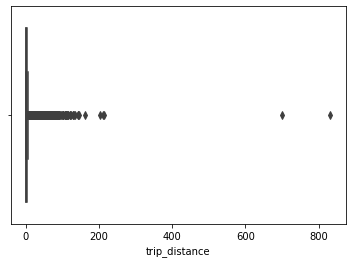

In [829]:
# detect outliers
# remove trip distance outlier: identify outliers using boxplot
sns.boxplot(jan['trip_distance'])

# remove outlier using IQR
Q1 = jan['trip_distance'].quantile(0.25)
Q3 = jan['trip_distance'].quantile(0.75)
IQR = Q3 - Q1 # interquartile range

filter = (jan['trip_distance'] >= Q1 - 1.5 * IQR) & (jan['trip_distance'] <= Q3 + 1.5 * IQR)
jan = jan.loc[filter]

# have we removed the outliers ?

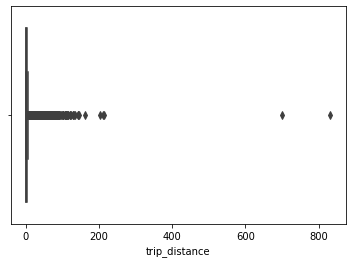

In [830]:
sns.boxplot(jan_2020['trip_distance'])

# remove outlier using IQR
Q1 = jan_2020['trip_distance'].quantile(0.25)
Q3 = jan_2020['trip_distance'].quantile(0.75)
IQR = Q3 - Q1 # interquartile range

filter = (jan_2020['trip_distance'] >= Q1 - 1.5 * IQR) & (jan_2020['trip_distance'] <= Q3 + 1.5 * IQR)
jan_2020 = jan_2020.loc[filter]

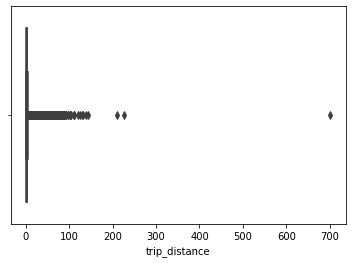

In [831]:
sns.boxplot(feb['trip_distance'])

# remove outlier using IQR
Q1 = feb['trip_distance'].quantile(0.25)
Q3 = feb['trip_distance'].quantile(0.75)
IQR = Q3 - Q1 # interquartile range

filter = (feb['trip_distance'] >= Q1 - 1.5 * IQR) & (feb['trip_distance'] <= Q3 + 1.5 * IQR)
feb = feb.loc[filter]

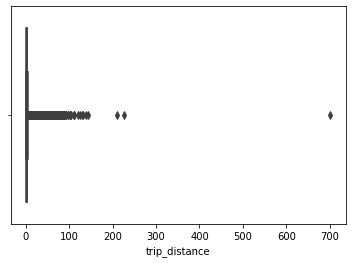

In [832]:
sns.boxplot(feb_2020['trip_distance'])

# remove outlier using IQR
Q1 = feb_2020['trip_distance'].quantile(0.25)
Q3 = feb_2020['trip_distance'].quantile(0.75)
IQR = Q3 - Q1 # interquartile range

filter = (feb_2020['trip_distance'] >= Q1 - 1.5 * IQR) & (feb_2020['trip_distance'] <= Q3 + 1.5 * IQR)
feb_2020 = feb_2020.loc[filter]

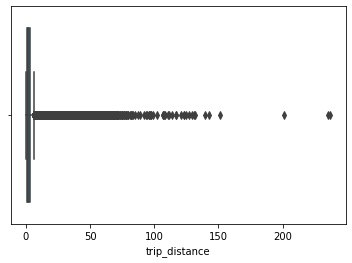

In [833]:
sns.boxplot(mar['trip_distance'])

# remove outlier using IQR
Q1 = mar['trip_distance'].quantile(0.25)
Q3 = mar['trip_distance'].quantile(0.75)
IQR = Q3 - Q1 # interquartile range

filter = (mar['trip_distance'] >= Q1 - 1.5 * IQR) & (mar['trip_distance'] <= Q3 + 1.5 * IQR)
mar = mar.loc[filter]

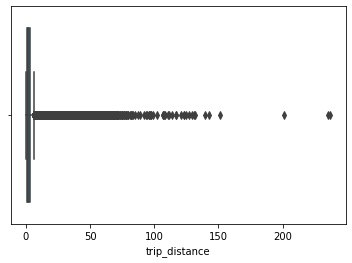

In [834]:
sns.boxplot(mar_2020['trip_distance'])

# remove outlier using IQR
Q1 = mar_2020['trip_distance'].quantile(0.25)
Q3 = mar_2020['trip_distance'].quantile(0.75)
IQR = Q3 - Q1 # interquartile range

filter = (mar_2020['trip_distance'] >= Q1 - 1.5 * IQR) & (mar_2020['trip_distance'] <= Q3 + 1.5 * IQR)
mar_2020 = mar_2020.loc[filter]

### To-do
- impute nan values for congestion_surcharge -> what method? -> impute with either 1 ✓
- need to identify overall data shape. how to plot data distribution? ✓
- imputation on nan values for year 2020 data ✓ 
- better visualisation graph #1 for overall data distribution
- detect outliers ✓ -> not sure if implemented correctly

## After pre-processing plot

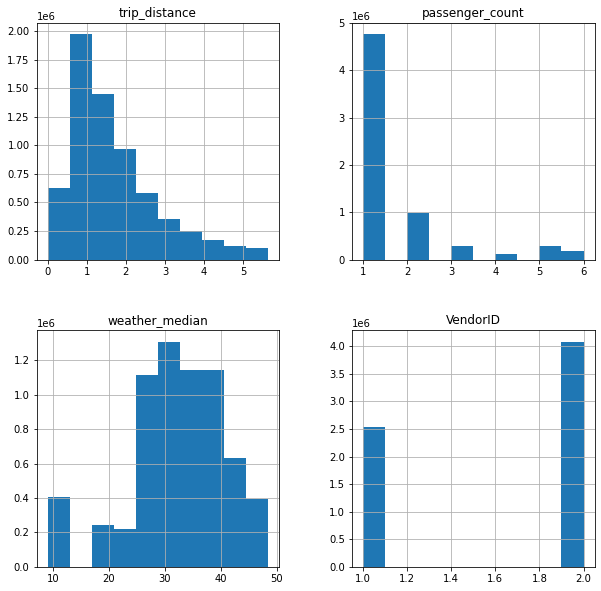

<Figure size 432x288 with 0 Axes>

In [835]:
# univariate histogram
histogram = jan.hist(figsize=(10,10), bins = 10, column=["trip_distance", "passenger_count", "weather_median","VendorID"])
# show plot
plt.show()
plt.savefig("../plots/data_distribution.png")

In [836]:
jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,"Rain, Melted Snow, Etc. (in)","Snow, Ice, Pellets, Hail (in)","Snow, Ice, Pellets, Hail, Ice on Ground (in)",weather_median
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,...,0.5,1.65,0.0,0.3,9.95,NaN,"0,06",0,0,48.5
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,...,0.5,1.00,0.0,0.3,16.30,NaN,"0,06",0,0,48.5
2,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.30,1,N,163,229,1,...,0.5,1.25,0.0,0.3,9.05,NaN,"0,06",0,0,48.5
3,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.70,1,N,229,7,1,...,0.5,3.70,0.0,0.3,18.50,NaN,"0,06",0,0,48.5
4,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.10,1,N,141,234,1,...,0.5,1.70,0.0,0.3,13.00,NaN,"0,06",0,0,48.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667326,2,2019-01-31 23:31:54,2019-01-31 23:50:36,2,4.28,1,N,186,262,1,...,0.5,3.66,0.0,0.3,21.96,0.0,0,0,0,9.0
7667328,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,...,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,9.0
7667329,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,...,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,9.0
7667330,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,...,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,9.0


### standarisation

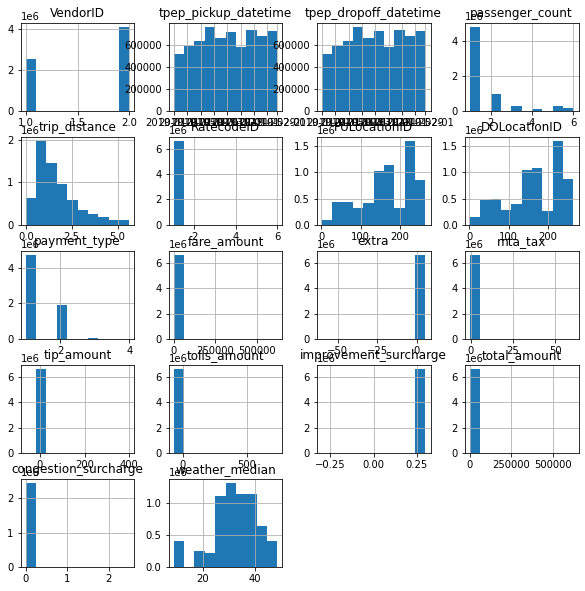

In [837]:
# univariate histogram
histogram = jan.hist(figsize=(10,10), bins = 10)
# show plot
plt.show()

In [838]:
# make trip total hours column
time_traveled = jan['tpep_dropoff_datetime'].astype('datetime64[ns]') - jan['tpep_pickup_datetime'].astype('datetime64[ns]')
jan['time_traveled (seconds)'] = time_traveled / np.timedelta64(1, "s")

time_traveled = feb['tpep_dropoff_datetime'].astype('datetime64[ns]') - feb['tpep_pickup_datetime'].astype('datetime64[ns]')
feb['time_traveled (seconds)'] = time_traveled / np.timedelta64(1, "s")

time_traveled = mar['tpep_dropoff_datetime'].astype('datetime64[ns]') - mar['tpep_pickup_datetime'].astype('datetime64[ns]')
mar['time_traveled (seconds)'] = time_traveled / np.timedelta64(1, "s")

In [839]:
time_traveled = jan_2020['tpep_dropoff_datetime'].astype('datetime64[ns]') - jan_2020['tpep_pickup_datetime'].astype('datetime64[ns]')
jan_2020['time_traveled (seconds)'] = time_traveled / np.timedelta64(1, "s")

time_traveled = feb_2020['tpep_dropoff_datetime'].astype('datetime64[ns]') - feb_2020['tpep_pickup_datetime'].astype('datetime64[ns]')
feb_2020['time_traveled (seconds)'] = time_traveled / np.timedelta64(1, "s")

time_traveled = feb_2020['tpep_dropoff_datetime'].astype('datetime64[ns]') - feb_2020['tpep_pickup_datetime'].astype('datetime64[ns]')
feb_2020['time_traveled (seconds)'] = time_traveled / np.timedelta64(1, "s")

## II. Save Preprocessed Data + Weather Data

In [840]:
# 2019 for train data
jan.to_csv("../preprocessed_data/January.csv")
feb.to_csv("../preprocessed_data/February.csv")
mar.to_csv("../preprocessed_data/March.csv")

# 2020 for test data
jan_2020.to_csv("../preprocessed_data/January_2020.csv")
feb_2020.to_csv("../preprocessed_data/February_2020.csv")
mar_2020.to_csv("../preprocessed_data/March_2020.csv")

# to-do: concatenate all data
# might want to drop some columns.